In [1]:
import pandas as pd
import torch
import numpy as np
import random
from random import shuffle
from matplotlib import pyplot as plt
import seaborn as sns
from torch.utils.data import TensorDataset, DataLoader
import wget
import os
import aiohttp
import asyncio
np.random.seed(17)
random.seed(17)
torch.manual_seed(17)
from fpl import FPL
from player import Player
from team import Team
from data_processor import get_fpl, get_players, get_teams, get_training_datasets
from models import PreviousScoreModel, PlayerAvgScoreModel, LinearModel

In [2]:
fpl = await get_fpl()
opponent_feature_names = ["npxG","npxGA"]
player_feature_names = ["total_points", "ict_index", "clean_sheets", "saves", "assists"]
teams = get_teams(team_feature_names=opponent_feature_names, visualize=False)
players = await get_players(player_feature_names, opponent_feature_names, visualize=False, num_players=580)
train_loader, test_loader, _ = get_training_datasets(players, teams)
train_loader, test_loader

(<torch.utils.data.dataloader.DataLoader at 0x7f7e656dcf50>,
 <torch.utils.data.dataloader.DataLoader at 0x7f7e656dcd50>)

In [3]:
previous_score_model = PreviousScoreModel(player_feature_names, opponent_feature_names)
player_avg_score_model = PlayerAvgScoreModel(player_feature_names, opponent_feature_names)
player_linear_score_model = LinearModel(player_feature_names, opponent_feature_names)
player_opponent_linear_score_model = LinearModel(player_feature_names, opponent_feature_names, use_opponent_features=True)

player_linear_score_model.fit(train_loader)
player_opponent_linear_score_model.fit(train_loader)
print(previous_score_model.eval(test_loader))
print(player_avg_score_model.eval(test_loader))
print(player_linear_score_model.eval(test_loader))
print(player_opponent_linear_score_model.eval(test_loader))

None
None
0.8826428954832926
SpearmanrResult(correlation=0.5577061500789653, pvalue=4.647171991308673e-272)
0.7455462569755194
SpearmanrResult(correlation=0.5781344635779202, pvalue=7.068538745469973e-297)
0.5701529414769687
SpearmanrResult(correlation=0.5958941168139651, pvalue=6.314e-320)
0.5693900012239799
SpearmanrResult(correlation=0.586420075274184, pvalue=1.878041117930428e-307)


torch.Size([3336, 5, 4])


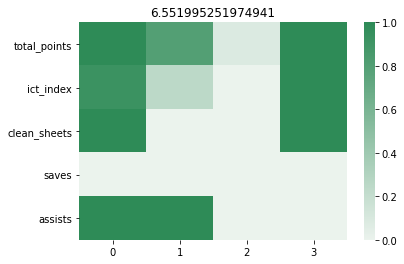

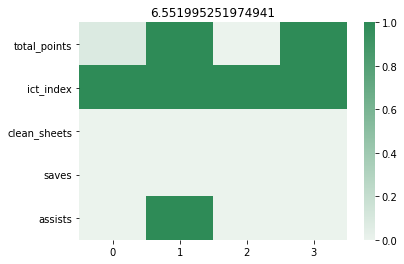

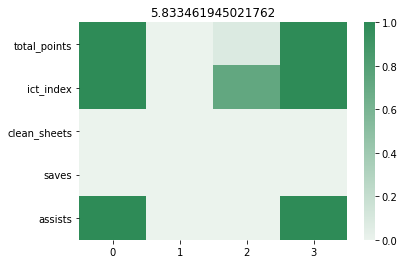

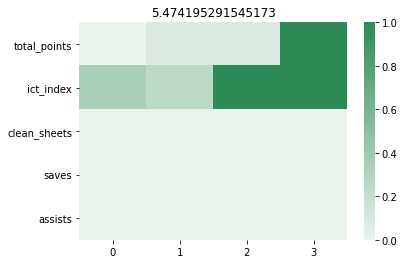

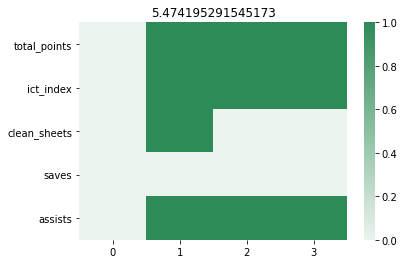

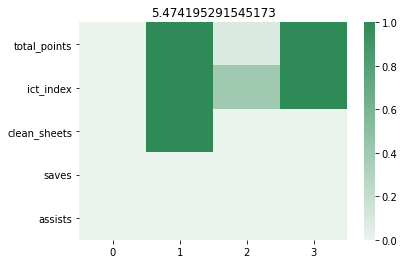

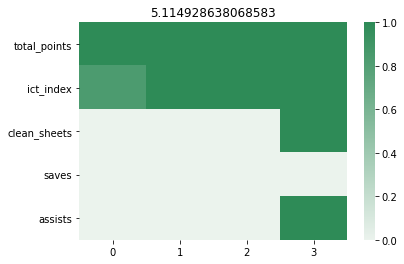

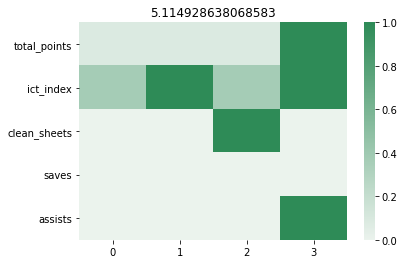

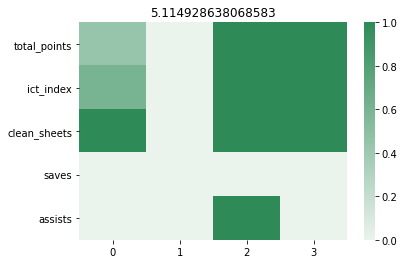

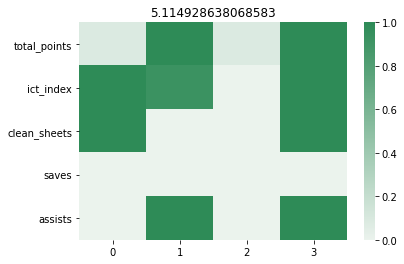

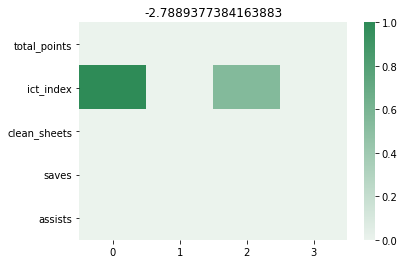

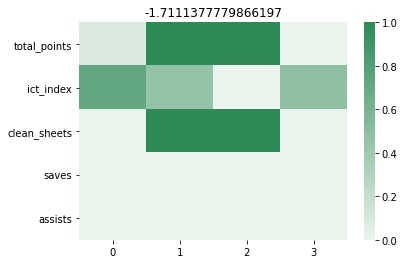

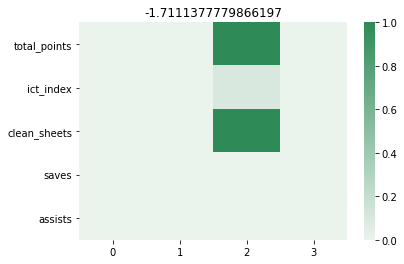

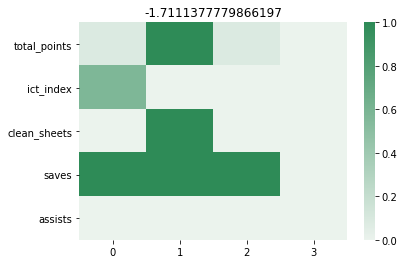

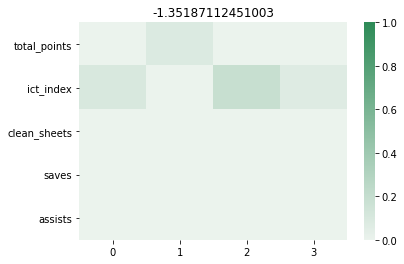

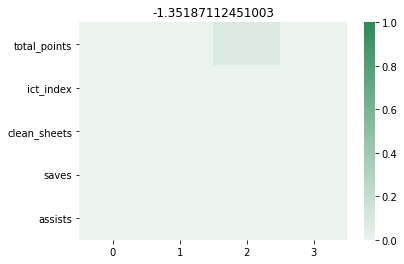

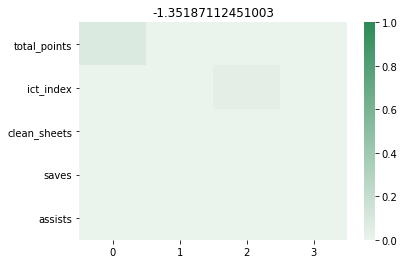

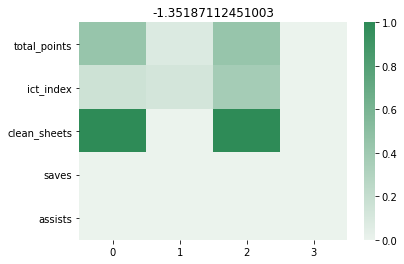

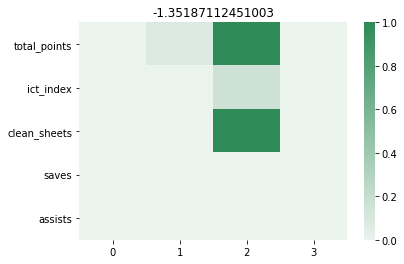

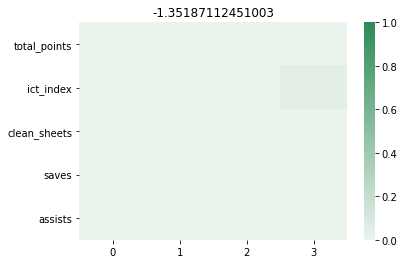

In [4]:
previous_score_model.visualize_predictions(test_loader)

torch.Size([3336, 5, 4])


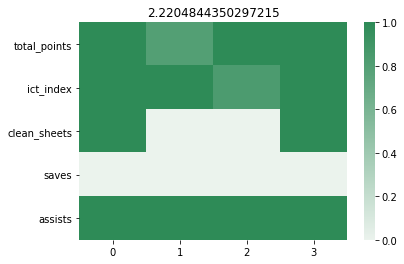

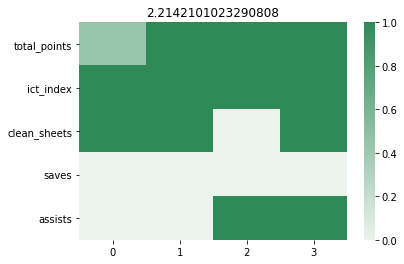

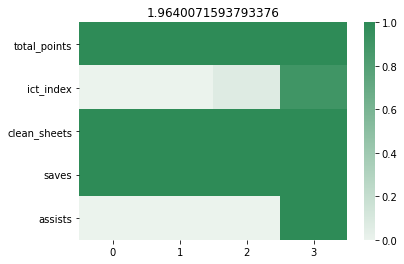

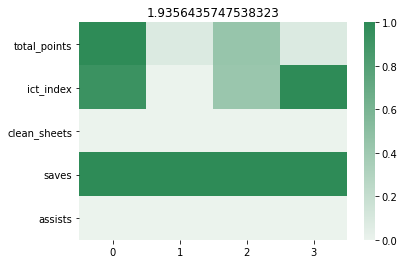

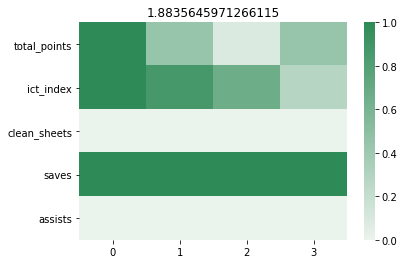

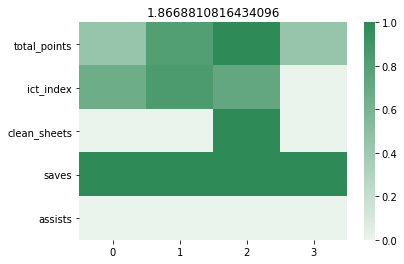

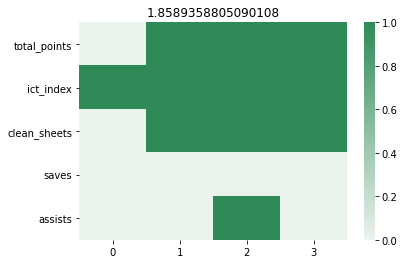

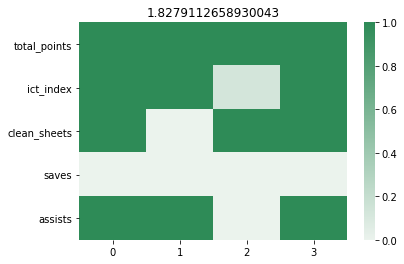

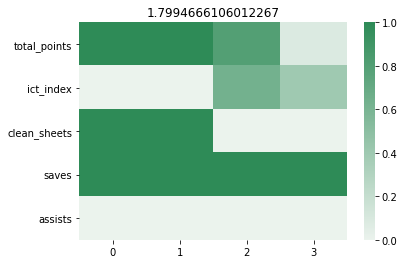

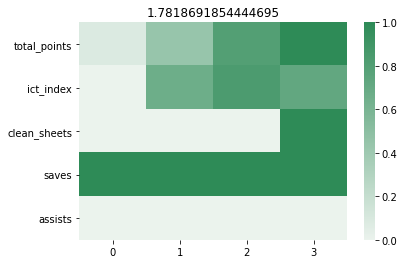

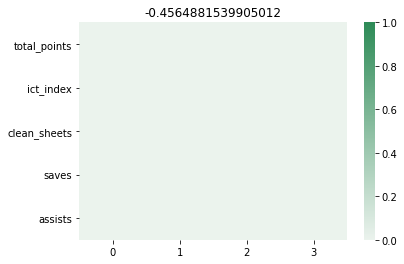

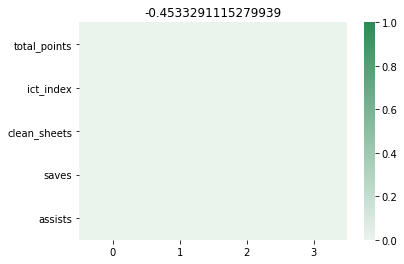

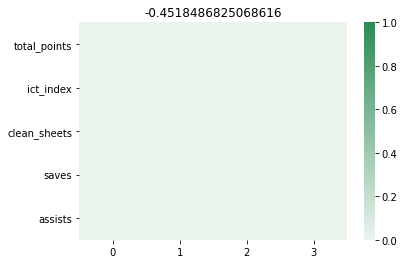

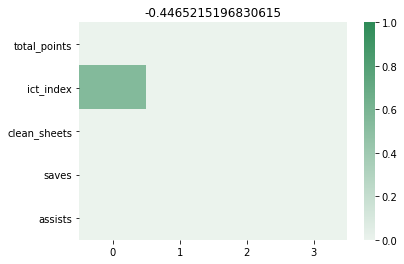

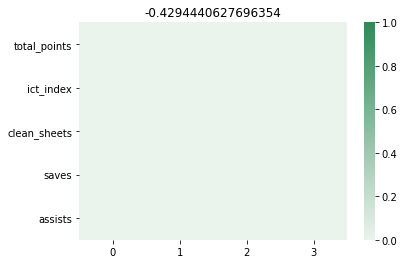

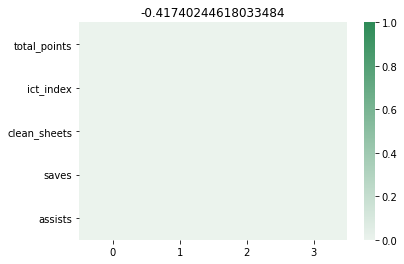

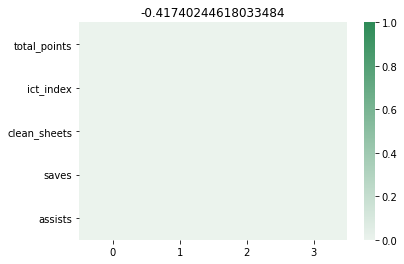

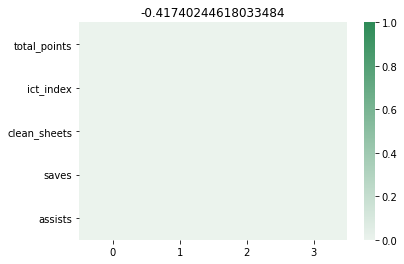

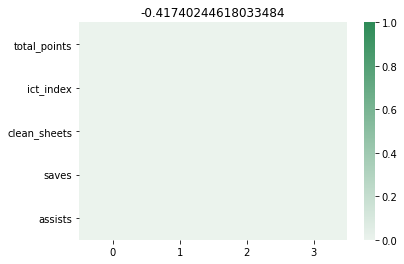

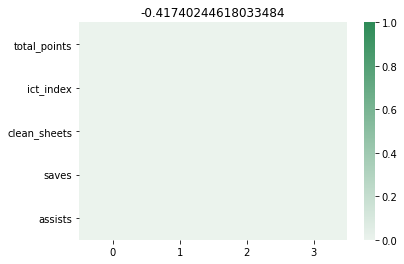

In [5]:
player_avg_score_model.visualize_predictions(test_loader)

torch.Size([3336, 5, 4])


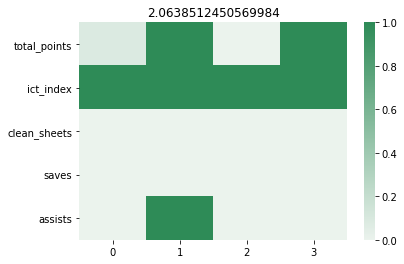

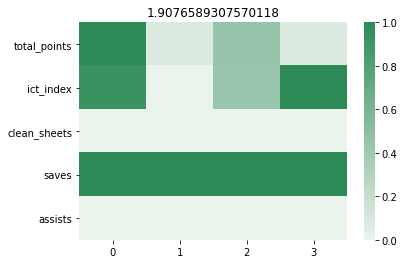

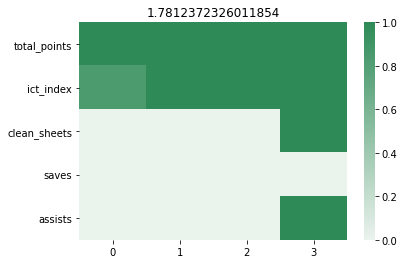

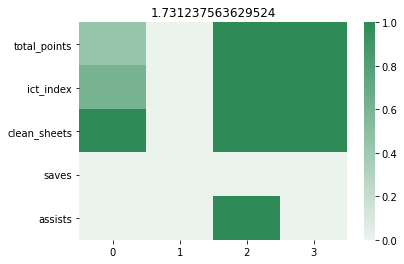

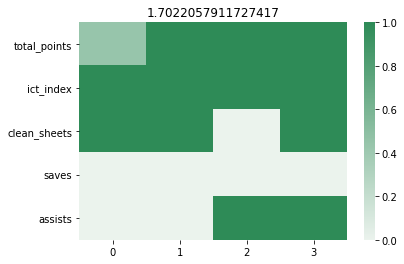

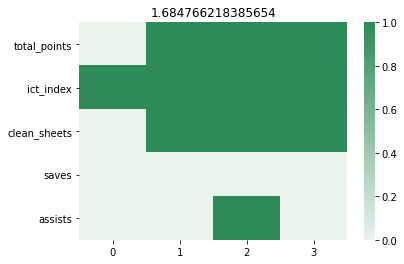

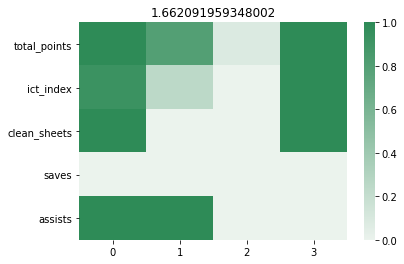

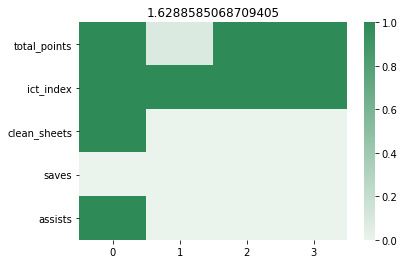

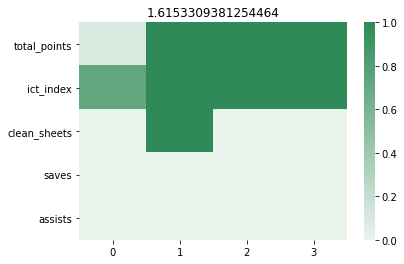

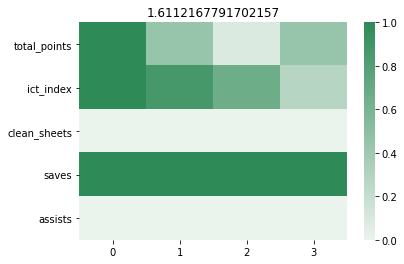

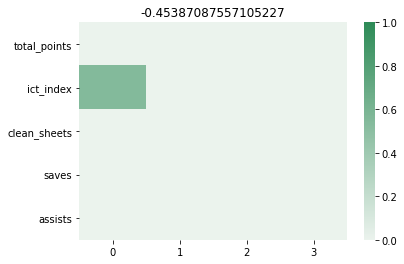

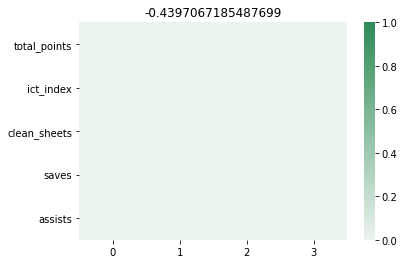

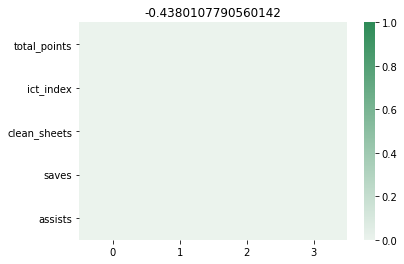

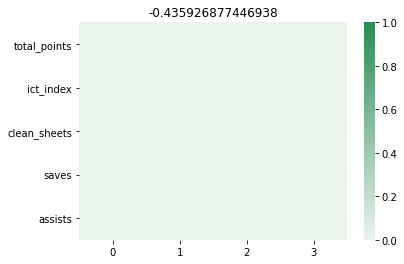

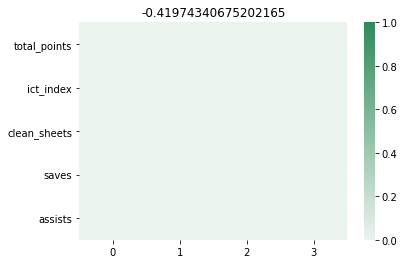

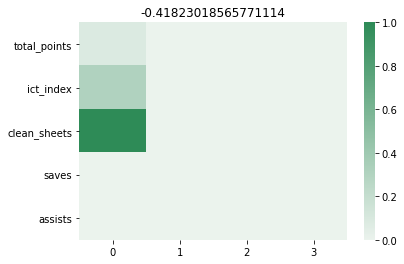

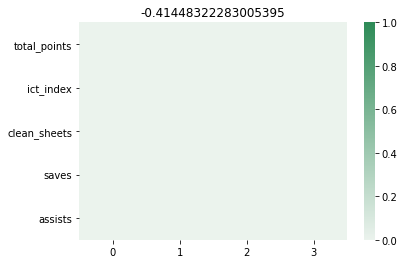

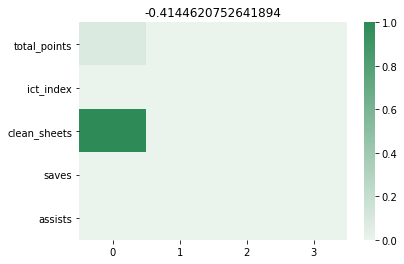

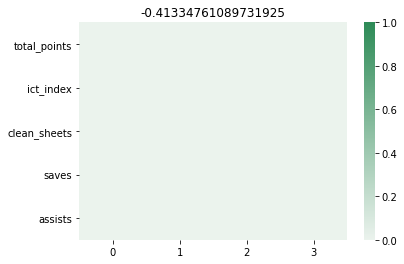

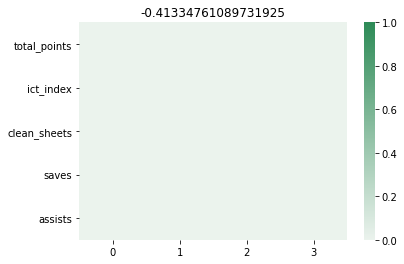

In [6]:
player_linear_score_model.visualize_predictions(test_loader)

torch.Size([3336, 20])


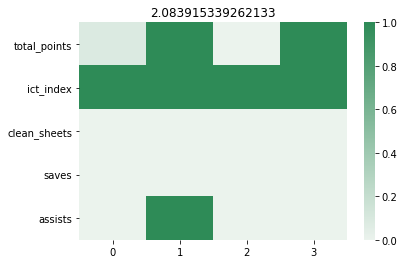

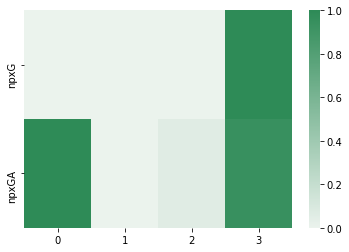

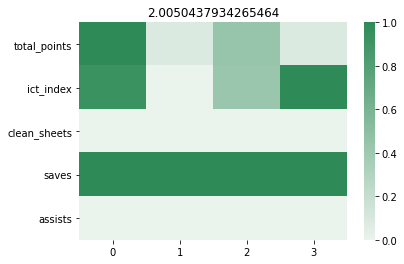

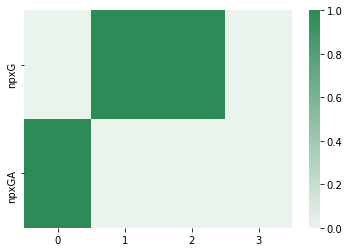

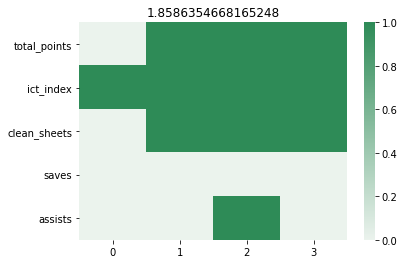

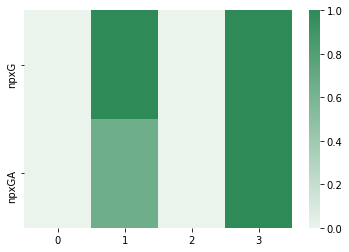

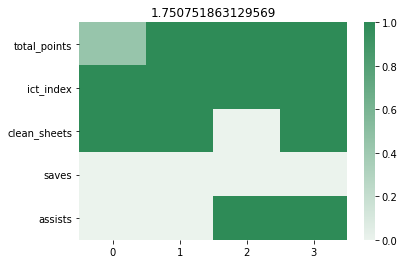

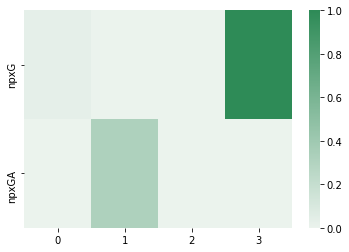

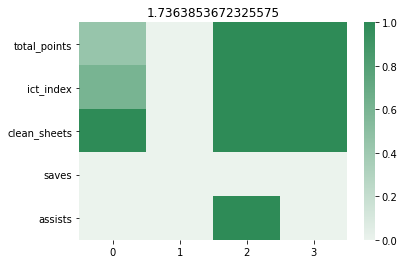

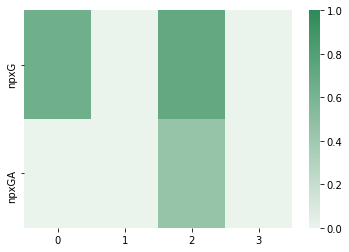

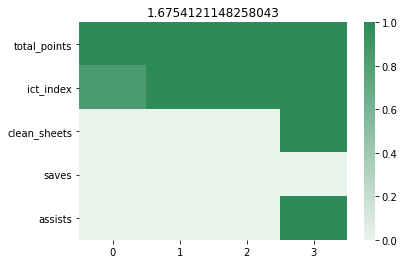

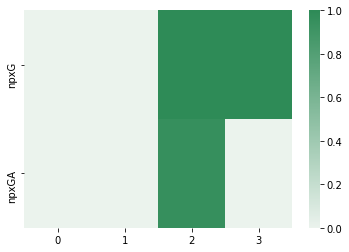

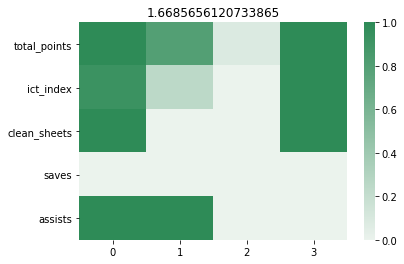

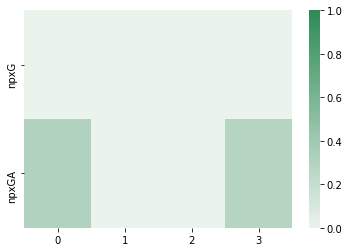

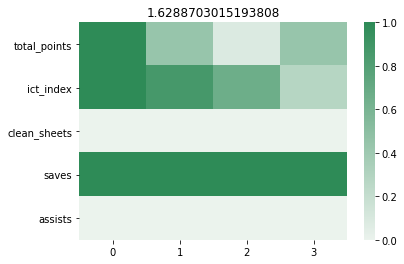

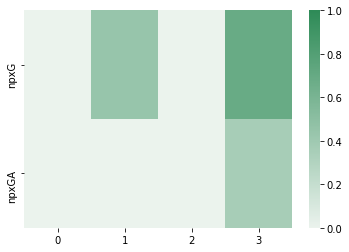

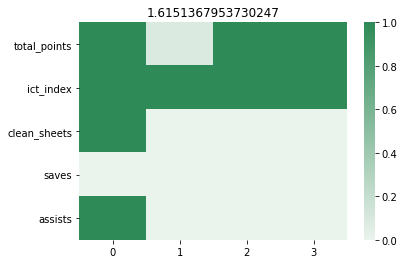

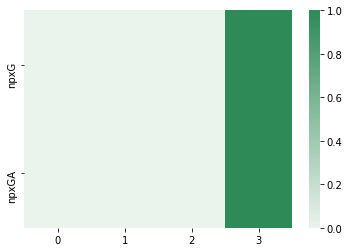

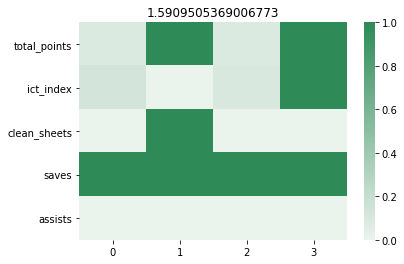

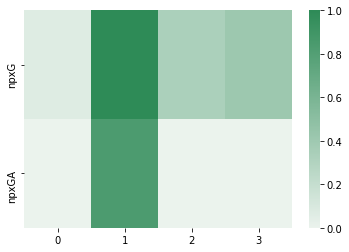

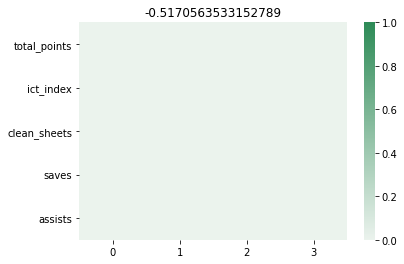

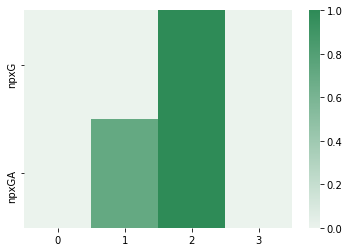

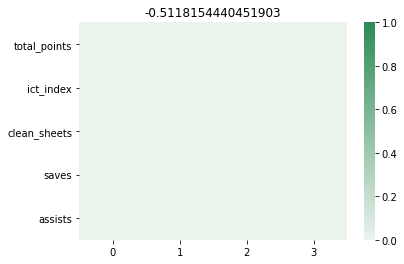

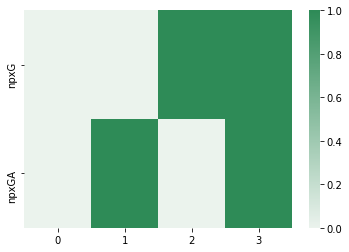

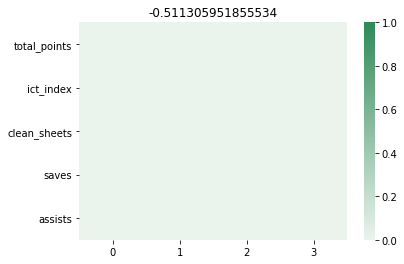

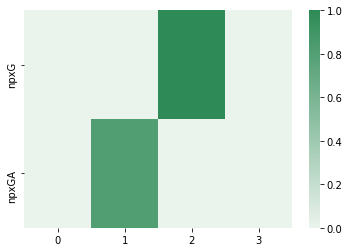

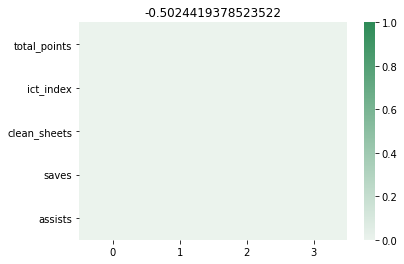

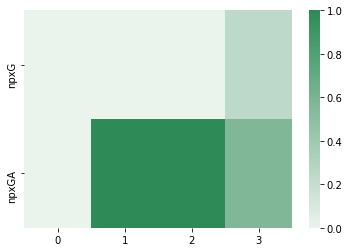

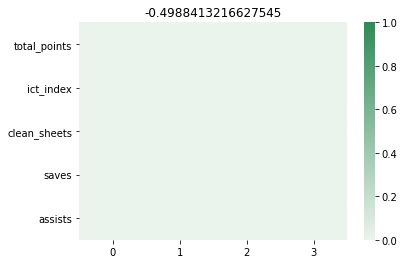

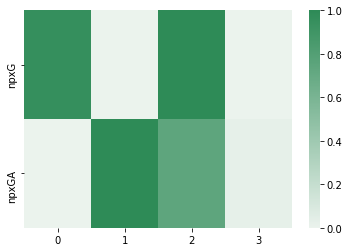

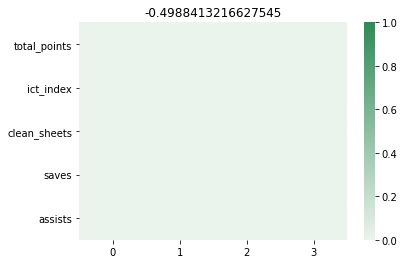

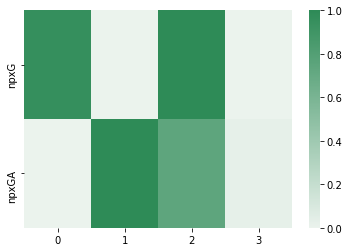

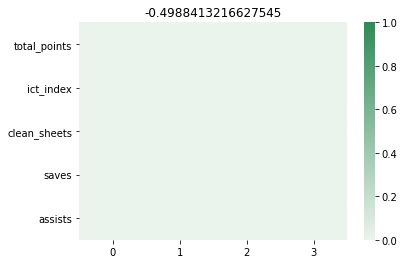

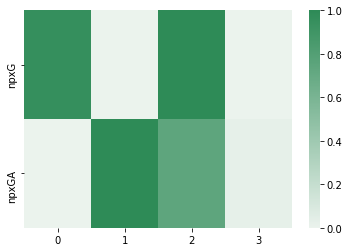

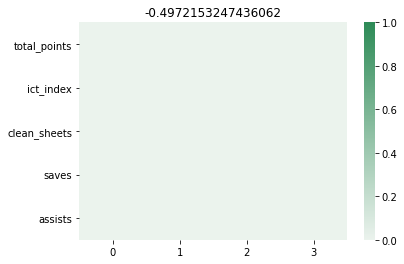

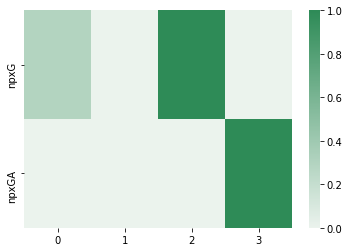

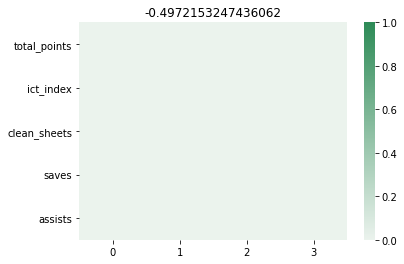

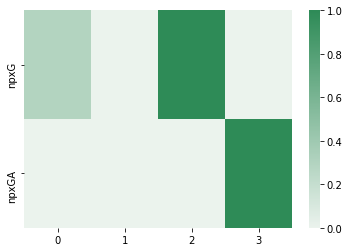

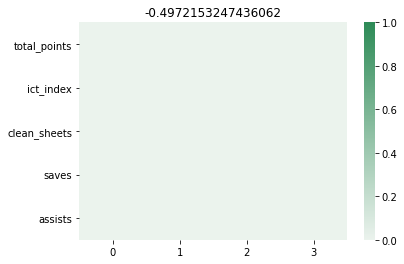

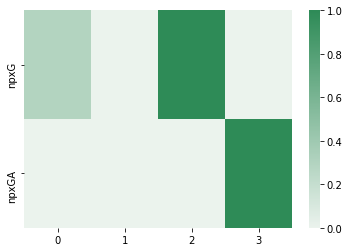

In [7]:
player_opponent_linear_score_model.visualize_predictions(test_loader)

In [8]:
list(player_linear_score_model.model.parameters())

[Parameter containing:
 tensor([[ 0.0367,  0.0572,  0.0560,  0.0520,  0.0573,  0.0418,  0.0860,  0.1550,
          -0.0157,  0.0464,  0.0227,  0.0427,  0.0669,  0.0154,  0.0129,  0.0465,
           0.0034,  0.0059, -0.0274, -0.0272]], dtype=torch.float64,
        requires_grad=True),
 Parameter containing:
 tensor([-0.0060], dtype=torch.float64, requires_grad=True)]